# Module 5 - Data Visualization in Python 

### What are some benefits of creating data visualizations?

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In [13]:
## to visualize data with python, you will need to import additional libraries ##

# old faithfuls - import these to easily work with datasets
import pandas as pd 
import numpy as np

# matplotlib.pyplot is a 2D plotting library that allows you to create high-quality figures
from matplotlib import pyplot as plt

# seaborn is complimentary to matplotlib and allows further customization of plots
import seaborn as sns

## set the color palette for all the plots in your notebook
# https://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_palette("bright") 

# this command allows you to view your plots in the notebook itself as you run the code
%matplotlib inline

In [14]:
## import the pokemon dataset ##

df = pd.read_csv("datasets/pokemon.csv", index_col = "Num")

df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Stage,Legendary
Num,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [15]:
df.info()
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
SpAtk        151 non-null int64
SpDef        151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB
Name         150
Type 1        15
Type 2        11
Total         74
HP            42
Attack        46
Defense       44
SpAtk         34
SpDef         29
Speed         42
Stage          3
Legendary      2
dtype: int64


# Visualizing Data

We are going to use the seaborn library to plot our data. We are going to cover the most commonly used plots, but there are a lot of options out there. Visit the following link to see the plots available to you: https://seaborn.pydata.org/examples/index.html

# Color Palettes

Half of the fun of visualizing data is making your plots aesthetically pleasing. You can create your own color palettes (you can also use the palettes that are included). Let's create a color palette that corresponds to the pokemon colors. 

In [16]:
# create unique color palette
# color Hex numbers are from "Bulbapedia"
# lookup hex numbers: https://htmlcolorcodes.com/

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# 1. SCATTERPLOT

A scatterplot is a graph in which the values of two variables are plotted along two axes. The pattern of the resulting points, or scatter, reveals any correlation present between the two variables. Scatterplots are used when you want to <b>show the relationship between two variables.</b> 

Scatterplots will commonly include a trendline to help make the relationship between the variables clearer. 

#### EXAMPLE

What is the relationship between weight and blood pressure?

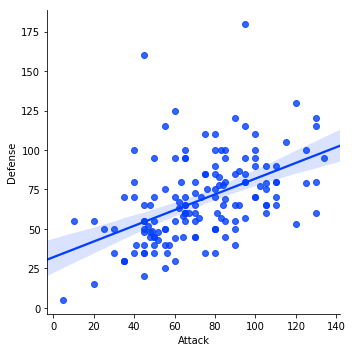

In [17]:
## make a scatterplot

# sns = referring to the seaborn library nickname
# lmplat = scatterplot reference
# x = variable you want to plot on the x-axis; y = variable you want to plot on the y-axis
# data = the name of the dataset you are pulling from 

sns.lmplot(x='Attack', y='Defense', data=df)

# 1b. DETAILED SCATTERPLOT

Additionally, varying sizes, shapes, and colors of dots can be used to represent a third (or sometimes forth) variable. For example, the scatterplot below shows "Attack" and "Defense" data but also adds in information about "Evolution Stage" represented by the color of the dot. 

#### EXAMPLE

What is the relationship between local unemployment rate and average starting salary? What does this relationship look like between states?

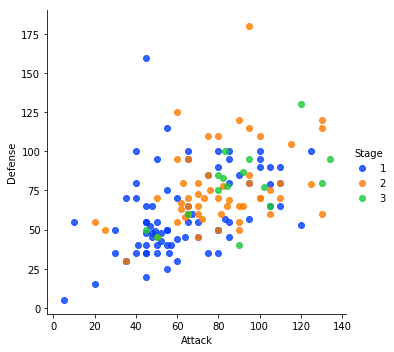

In [18]:
## add more details to scatterplot

sns.lmplot(x='Attack', y='Defense', data=df, 
           fit_reg=False, #remove regression line
           hue='Stage')   #color by evolution stage

# 2. HISTOGRAM

Histograms allow you to plot the distribution** of numeric variables. A histogram lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc.


**<b>the distribution of your data shows how often a data point occurs</b>

#### EXAMPLE

What is the distrbution of savings for a group of clients at a specific bank?

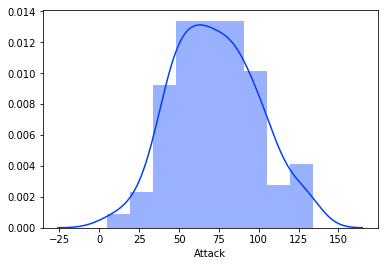

In [21]:
##### create a histogram of the distribution of attack power

sns.distplot(df['Attack'])

# 3. BOXPLOT

A boxplot shows the <b>distribution of your data</b> based on five summary points:
* Minimum (lower limit cut-off for acceptable values)
* First Quartile (Q1)
* Median (Q2)
* Third Quartile (Q3)
* Maximum (upper limit cut-off for acceptable values)

The minimum and maximum are represented as each end of an 'extreme line' which shows the highest and lowest values excluding outliers. A boxplot will visually show you potential outliers, and can also show you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. 

#### EXAMPLE

What is the distribution of annual alumni contributions and type (i.e., community, private, public, 2-year, etc.) of college?

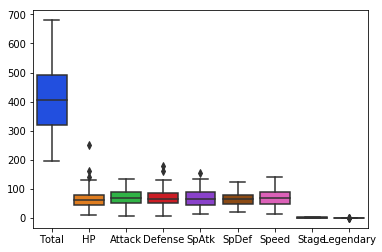

In [19]:
# boxplot showing stats for each characteristic

# sns = referring to the seaborn library nickname
# boxplot = boxplot reference
# data = the name of the dataset you are pulling from

sns.boxplot(data=df)

# whats wrong with this plot?

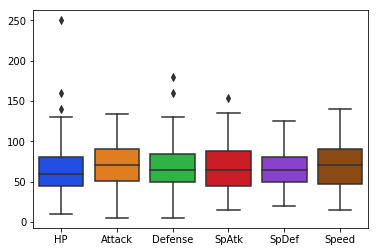

In [20]:
# create a dataframe containing only the variables needed - pokemon stats
# drop Total, Stage, and Legendary

df2 = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

# boxplot for stats

sns.boxplot(data=df2)

# the distribution of data is fairly similar across stats
# HP, DEFENSE & SP ATTACK shows some outliers

# 4. BAR/COUNT PLOTS

Bar plots help you visualize the distributions of categorical variables.

A count plot is a bar plot where the dependent variable (y-axis) is the number of instances of the independent variable (x-axis).

#### EXAMPLE

* What is the frequency of pen colors at my desk?
* What is the average length of different specifies of caterpillars? 

Text(0.5, 1.0, 'Frequency of Pokemon by Type ')

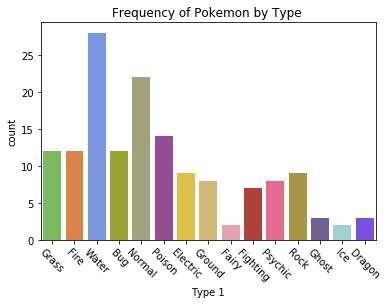

In [22]:
## COUNT PLOT ##

# Counts the number of values for a given category

sns.countplot(x='Type 1',
              data=df, 
              palette=pkmn_type_colors)

plt.xticks(rotation=-45) # rotate the labels at the bottom of the graph 

plt.title('Frequency of Pokemon by Type ') # give the plot a title

Text(0.5, 1.0, 'Frequency of Pokemon Type by Stage')

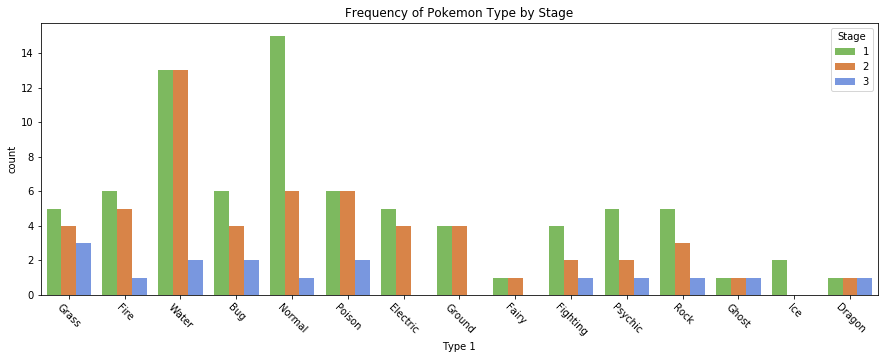

In [23]:
# Counts the number of values for a given category

plt.figure(figsize=(15,5)) # adjust the size of the output plot

sns.countplot(x='Type 1', hue = "Stage",
              data=df, 
              palette=pkmn_type_colors)

plt.xticks(rotation=-45) # rotate the labels at the bottom of the graph 

plt.title('Frequency of Pokemon Type by Stage') # give the plot a title

Text(0.5, 1.0, 'Attack Stat by Pokemon Type')

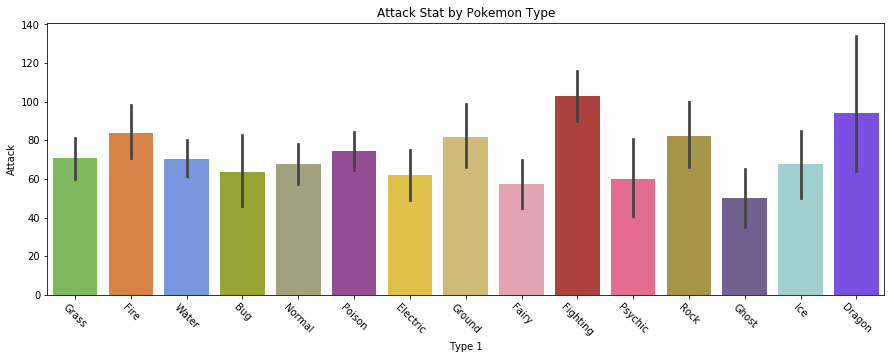

In [24]:
## BAR PLOT ##

# Plots two variables - one numeric, one categorical

plt.figure(figsize=(15,5)) # adjust the size of the output plot

sns.barplot(x = 'Type 1', y = 'Attack',  
            data=df, 
            palette=pkmn_type_colors)

plt.xticks(rotation=-45) # rotate the labels at the bottom of the graph 

plt.title('Attack Stat by Pokemon Type') # give the plot a title

### What are those black bars? 95% CONFIDENCE INTERVALS

The black bars at the top of each bar represent the <b>confidence interval</b> for that estimation. Each bar is providing an estimate of the mean attack for a given group of Pokemon. 

We can interpret these bars by saying: "We are 95% confident that the true mean is within this range."

If you are seeking to compare the means of two groups, you want to pay attention to how the black bars overlap. If the confidence interval of two groups overall - there is no satistically significant difference between the group means. 

In [25]:
sns.barplot?

Text(0.5, 1.0, 'Attack Stat by Pokemon Type')

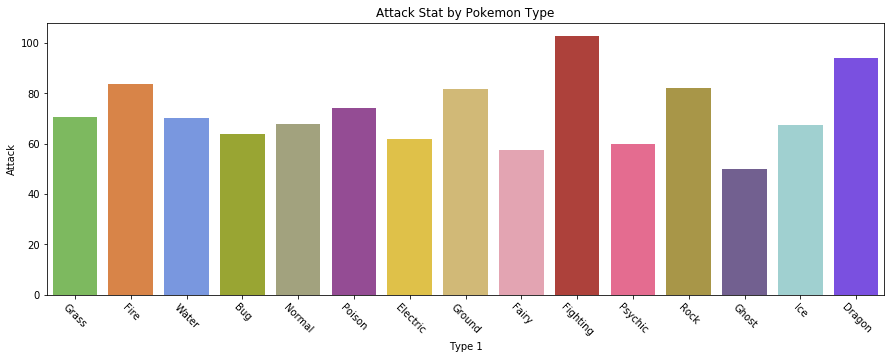

In [26]:
# Barplot WITHOUT confidence intervals 

plt.figure(figsize=(15,5)) # adjust the size of the output plot

sns.barplot(x = 'Type 1', y = 'Attack',ci=None,  # <<<
            data=df, 
            palette=pkmn_type_colors)

plt.xticks(rotation=-45) # rotate the labels at the bottom of the graph 

plt.title('Attack Stat by Pokemon Type') # give the plot a title

# 4. SWARM PLOT

Swarm plots <b>plot all the data points for a given group.</b> Swarm plots attempt to avoid obsuring data points by forcing the data points to not overlap with each other. In some instances, the swarms take the shape of the violin plot. 

#### EXAMPLE

What are the average daily lemonade stand sales from stands across varous neighborhoods?

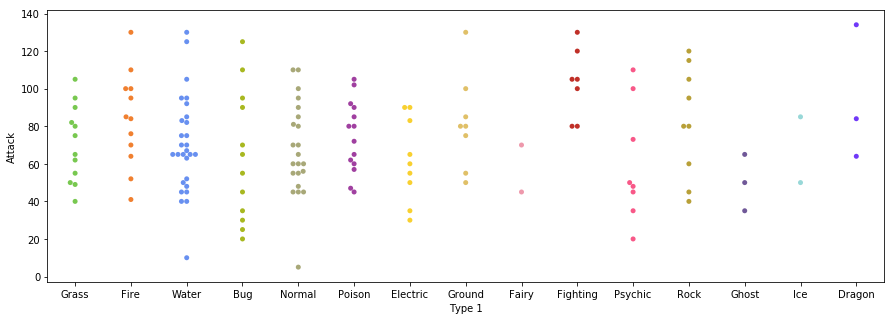

In [27]:
# swarm plot

plt.figure(figsize=(15,5))

sns.swarmplot(x='Type 1', y='Attack', 
              data=df, 
              palette=pkmn_type_colors)

# 5. VIOLIN PLOT

A violin plot is a hybrid between a density plot and a box plot. <b>Violin plots visualize the distribution of a numeric variable for one or several groups.</b> Each violin represents a group and the shape represents the density estimate of the variable - the more data points in a specific range, the larger the violin is for that range. 

The inner bars within each violin represent the same values shown with a box plot. 

* The white dot represents the median
* The thicker bar represents the IQR
* The thinner bar represents the 'extreme line' (the highest and lowest value excluding outliers)

The below violin plot shows the relationship of Pokemon type to attack stat. The plot shows the median attack for GHOST type pokemon is lower than for other Pokemon types. FIGHTING type pokemon have the highest median attack.

#### EXAMPLE

What is the distribution of annual alumni contributions and type (i.e., community, private, public, 2-year, etc.) of college?

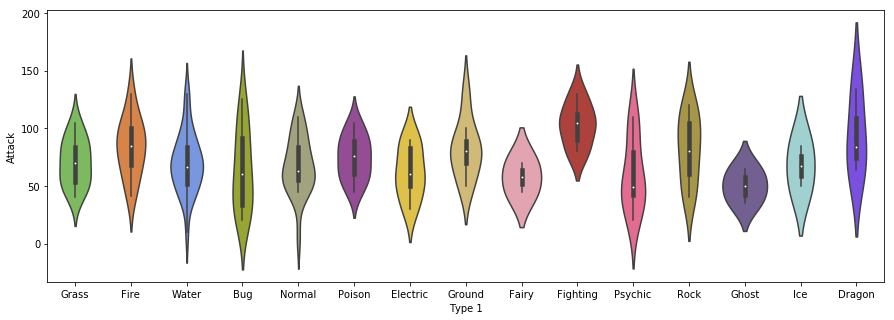

In [28]:
# violin plot shows the distribution of attack power for each type

# sns = referring to the seaborn library nickname
# violinplot = violin plot reference
# data = the name of the dataset you are pulling from
# x = variable along the x-axis, y = variable along the y-axis 

plt.figure(figsize=(15,5))
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

# 6. COMBINATION PLOT

Sometimes you can plot two plots on top of each other. This only works in certain instances and you have to be careful with readability. Plot two charts in the same cell to plot them together. Violin plots and swarm plots give greater detail to the distribution of data when plotted together. 

#### EXAMPLE

What is the average height of basketball players across 10 different teams?

Text(0.5, 1.0, 'Attack by Type')

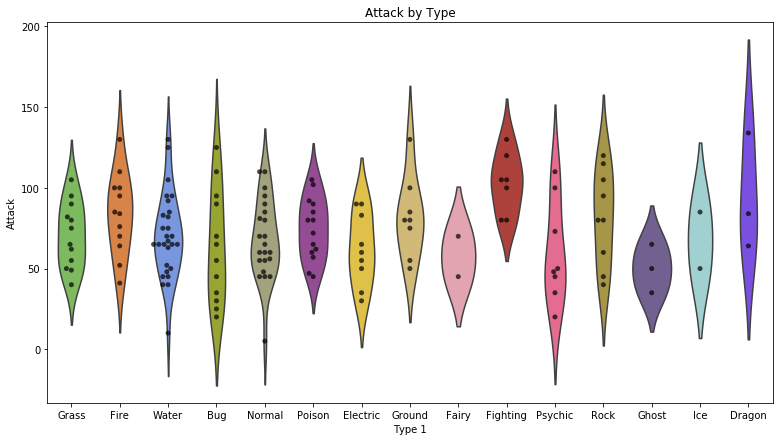

In [29]:
# combine a violin plot with a swarm plot

plt.figure(figsize=(13,7)) # adjust plot size


sns.violinplot(x='Type 1',
               y='Attack',
               data=df,
               inner=None, #removes bars inside violin plot
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',
              y='Attack',
              data=df,
              color='k', # make points black
              alpha=0.7) # points slightly transparent

plt.title('Attack by Type') # give the plot a title

# 7. HEATMAP

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. When used in conjunction with a correlation matrix, a heatmap allows us to quickly ascertain the highest or lowest values, thus representing the strongest correlations. 

#### EXAMPLE

How strongly are my numeric variables correlated with each other? What is the direction of the relationship?

In [30]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Stage,Legendary
Num,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


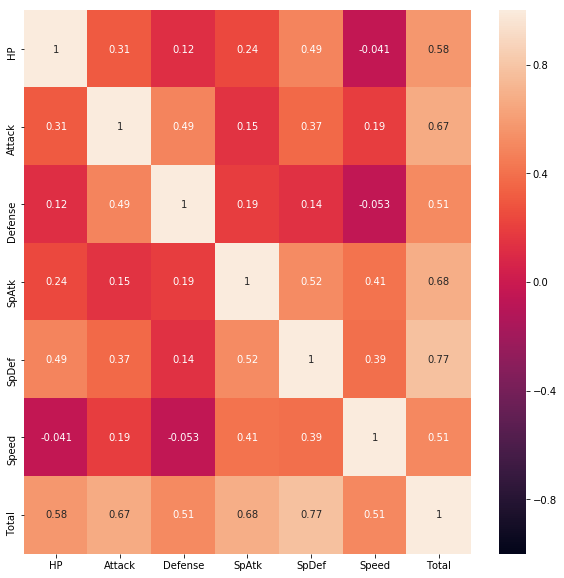

In [31]:
#show correlation of stats via heatmap
plt.figure(figsize=(10,10))

# create a dataset with only numeric variables
df_numeric = df[["HP", "Attack", "Defense", "SpAtk", "SpDef", "Speed", "Total"]]

# calculate the correlation matrix for the numeric dataset 
corr = df_numeric.corr()

#plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin=-1, annot=True)

# 8. FACTOR PLOT

Factor plots make it easy to separate plots by categorical classes. This lets us see what data looks like when segmented by one or more variables.  

#### EXAMPLE

What is the average price of a movie ticket at 5 different national cinemas? What do these prices look like between three major cities?

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


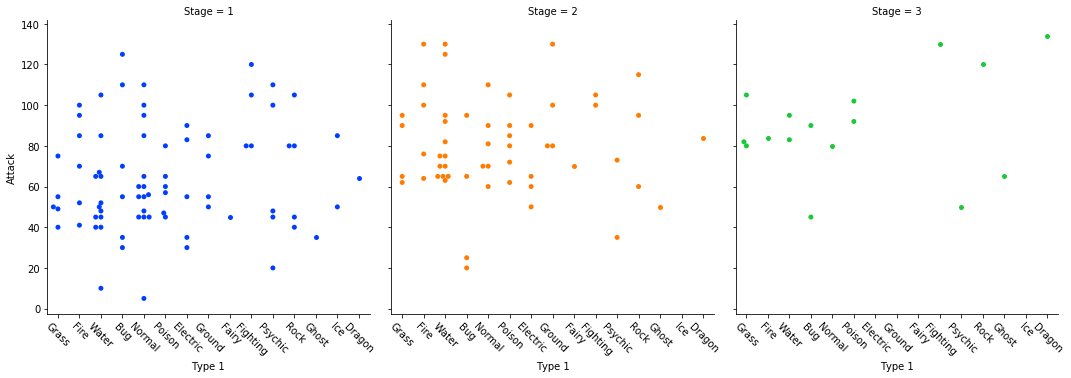

In [32]:
#scatterplot by each stage type (evolution level)
g = sns.factorplot(x='Type 1', y='Attack',
                   data=df,
                   hue='Stage', 
                   col='Stage',
                   kind='swarm')

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


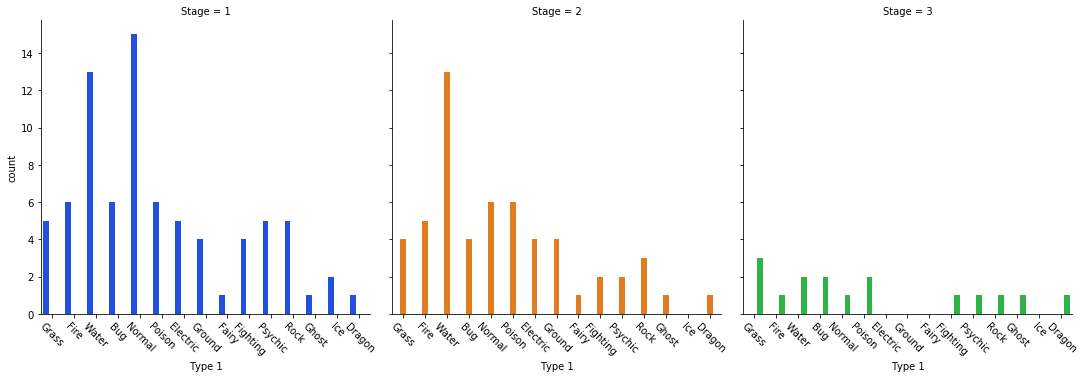

In [33]:
#scatterplot by each stage type (evolution level)
g = sns.factorplot(x='Type 1',
                   data=df,
                   hue='Stage', 
                   col='Stage',
                   kind='count') # play with the options ``point``, ``bar``, ``count``, ``box``, ``violin``, ``strip``

#rotate x-axis labels on ALL charts
g.set_xticklabels(rotation=-45)

Source: https://elitedatascience.com/python-seaborn-tutorial